In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("./datasets/Placement_Data_Full_Class.csv")

In [70]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [72]:
df=df.fillna(0)
df=df.drop('sl_no',axis=1)

In [73]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [74]:
col_enc = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
Ocol=[]
Lcol=[]
for i in col_enc:
    if len(df[i].value_counts())>2:
        Ocol.append(i)
    else:
        Lcol.append(i)
print(Ocol,Lcol)

['hsc_s', 'degree_t'] ['gender', 'ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']


In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Oenc = OneHotEncoder(sparse=False)
columns_to_one_hot = Ocol
encoded_array = Oenc.fit_transform(df.loc[:,columns_to_one_hot])
df_encoded = pd.DataFrame(encoded_array,columns=Oenc.get_feature_names_out() )
df = pd.concat([df,df_encoded],axis=1)
df.drop(labels= columns_to_one_hot,axis=1,inplace=True)
df

Lenc=[]
for i in range(len(Lcol)):
    Lenc.append(LabelEncoder())
    df[Lcol[i]]= Lenc[i].fit_transform(df[Lcol[i]])

In [76]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,270000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,200000.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,250000.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,425000.0,0.0,1.0,0.0,1.0,0.0,0.0


In [77]:
from scipy import stats

z= np.abs(stats.zscore(df))
print(df.shape)

(215, 18)


In [78]:
df=df[(np.abs(stats.zscore(df))<3).all(axis=1)]
df.shape

(194, 18)

In [79]:
df_R=df[(df["salary"]!=0)]
y_R=df_R["salary"]
y_C=df["status"].copy()
x_C=df.drop(["status","salary"],axis=1)
x_R=df_R.drop(["salary","status"],axis=1)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_C = pd.DataFrame(scaler.fit_transform(x_C),columns=x_C.columns)
x_R = pd.DataFrame(scaler.fit_transform(x_R),columns=x_R.columns)

In [81]:
df_R=x_R.copy()
df_R["salary"]=y_R.values
df_C=x_C.copy()
df_C["status"]=y_C.values

# Grid search function

In [82]:
from sklearn.model_selection import GridSearchCV
def Grid_search(model,parameters):
    models= GridSearchCV(model, parameters)
    models.fit(x_train,y_train)

    result=models.cv_results_
    params=parameters.keys()
    best=np.where(result['rank_test_score']==1)[0][0]
    best_parameters=parameters.copy()
    for param in params:
        best_parameters[param]=result["param_"+param][best]
    return best_parameters

# Regression

In [83]:
y_R

0      270000.0
1      200000.0
4      425000.0
7      252000.0
8      231000.0
         ...   
209    216000.0
210    400000.0
211    275000.0
212    295000.0
213    204000.0
Name: salary, Length: 136, dtype: float64

In [84]:
x_R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1.0,0.445545,1.0,0.857051,1.0,0.068966,0.0,0.104167,1.0,0.268844,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.750743,0.0,0.586729,1.0,0.740690,1.0,0.760417,0.0,0.582077,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.910891,0.0,0.485812,0.0,0.596552,0.0,0.975000,0.0,0.130653,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.816832,0.0,0.280990,0.0,0.344828,1.0,0.354167,0.0,0.408710,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.594059,0.0,0.601024,0.0,0.551724,0.0,0.861250,0.0,0.373116,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.0,0.321782,0.0,0.451675,0.0,0.310345,0.0,0.354167,0.0,0.172111,0.0,1.0,0.0,1.0,0.0,0.0
132,1.0,0.782178,1.0,0.665031,1.0,0.744828,0.0,0.854167,0.0,0.925879,0.0,1.0,0.0,1.0,0.0,0.0
133,1.0,0.222772,1.0,0.195648,1.0,0.551724,0.0,0.500000,0.0,0.051926,0.0,0.0,1.0,0.0,0.0,1.0
134,1.0,0.445545,1.0,0.344997,1.0,0.586207,1.0,0.187500,0.0,0.726131,0.0,1.0,0.0,1.0,0.0,0.0


In [85]:
df_R

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,salary
0,1.0,0.445545,1.0,0.857051,1.0,0.068966,0.0,0.104167,1.0,0.268844,0.0,1.0,0.0,0.0,0.0,1.0,270000.0
1,1.0,0.750743,0.0,0.586729,1.0,0.740690,1.0,0.760417,0.0,0.582077,0.0,0.0,1.0,0.0,0.0,1.0,200000.0
2,1.0,0.910891,0.0,0.485812,0.0,0.596552,0.0,0.975000,0.0,0.130653,0.0,1.0,0.0,1.0,0.0,0.0,425000.0
3,1.0,0.816832,0.0,0.280990,0.0,0.344828,1.0,0.354167,0.0,0.408710,0.0,0.0,1.0,0.0,0.0,1.0,252000.0
4,1.0,0.594059,0.0,0.601024,0.0,0.551724,0.0,0.861250,0.0,0.373116,0.0,1.0,0.0,1.0,0.0,0.0,231000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1.0,0.321782,0.0,0.451675,0.0,0.310345,0.0,0.354167,0.0,0.172111,0.0,1.0,0.0,1.0,0.0,0.0,216000.0
132,1.0,0.782178,1.0,0.665031,1.0,0.744828,0.0,0.854167,0.0,0.925879,0.0,1.0,0.0,1.0,0.0,0.0,400000.0
133,1.0,0.222772,1.0,0.195648,1.0,0.551724,0.0,0.500000,0.0,0.051926,0.0,0.0,1.0,0.0,0.0,1.0,275000.0
134,1.0,0.445545,1.0,0.344997,1.0,0.586207,1.0,0.187500,0.0,0.726131,0.0,1.0,0.0,1.0,0.0,0.0,295000.0


/home/priyanshu/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


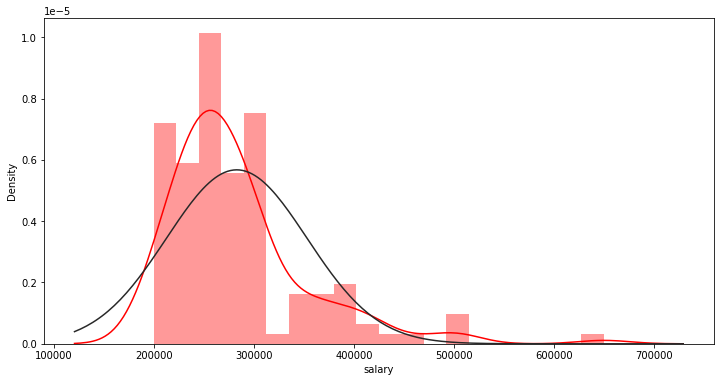

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

plt.figure(figsize=(12,6))
sns.distplot(df_R['salary'],fit=norm,color='r')
plt.show()

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [88]:
def feature_selection(variable_counts,func):
    test=SelectKBest(score_func=func,k=variable_counts)
    fit=test.fit(x_R,y_R)
    feature_selected=x_R.columns[fit.get_support()]
    X_sel = fit.transform(x_R)
    
    reg=LinearRegression()
    reg.fit(X_sel,y_R)
    y_pred=reg.predict(x_R[feature_selected])
    return  mean_squared_error(y_R,y_pred)

In [89]:
error_t = pd.DataFrame({'features count':[],'error':[],'func name' : []})
function_list =[chi2, f_classif, mutual_info_classif]
function_name =['chi2', 'f_classif', 'mutual_info_classif']
k=0
for j in function_list:
    for i in range(1,len(df_R.columns)):
        error= feature_selection(i,j)
        error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
    k+=1
error_t

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_13062/681591706.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_13062/681591706.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: 

,features count,error,func name
0,1.0,4.722834e+09,chi2
1,2.0,4.652560e+09,chi2
2,3.0,4.629803e+09,chi2
3,4.0,4.554642e+09,chi2
4,5.0,4.554147e+09,chi2
5,6.0,4.554147e+09,chi2
6,7.0,4.490569e+09,chi2
7,8.0,4.469082e+09,chi2
8,9.0,4.469082e+09,chi2
9,10.0,4.144415e+09,chi2


<AxesSubplot:xlabel='features count', ylabel='error'>

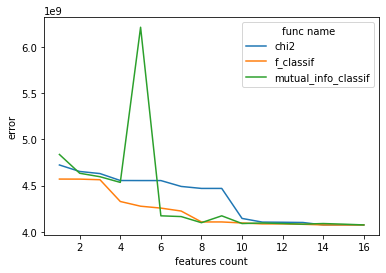

In [90]:
sns.lineplot(data=error_t,x='features count',y='error',hue='func name')

              features     scores
15   degree_t_Sci&Tech  30.677167
12       hsc_s_Science  23.037521
2                ssc_b  22.807215
8       specialisation  21.241885
6               workex  19.941688
11      hsc_s_Commerce  17.130464
0               gender  14.724561
4                hsc_b  14.206061
13  degree_t_Comm&Mgmt  12.334119
9                mba_p   8.410377
7              etest_p   8.038389
5             degree_p   5.590732
1                ssc_p   4.575824
3                hsc_p   4.396772
10          hsc_s_Arts        NaN
14     degree_t_Others        NaN
AxesSubplot(0.125,0.125;0.775x0.755)
              features    scores
9                mba_p  1.787408
1                ssc_p  1.624569
5             degree_p  1.588360
0               gender  1.284803
7              etest_p  1.246348
3                hsc_p  1.162567
2                ssc_b  1.108002
15   degree_t_Sci&Tech  1.060465
13  degree_t_Comm&Mgmt  1.060465
4                hsc_b  0.963782
11      hsc_s_Commerce

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


              features    scores
0               gender  0.924548
13  degree_t_Comm&Mgmt  0.849143
4                hsc_b  0.308108
9                mba_p  0.269550
11      hsc_s_Commerce  0.217728
14     degree_t_Others  0.157506
8       specialisation  0.144972
2                ssc_b  0.135404
12       hsc_s_Science  0.114587
7              etest_p  0.112532
6               workex  0.108243
5             degree_p  0.096989
3                hsc_p  0.090324
15   degree_t_Sci&Tech  0.075490
1                ssc_p  0.000000
10          hsc_s_Arts  0.000000
AxesSubplot(0.125,0.125;0.775x0.755)


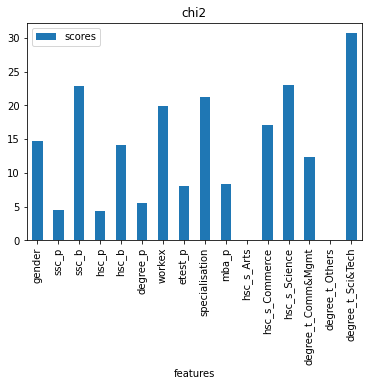

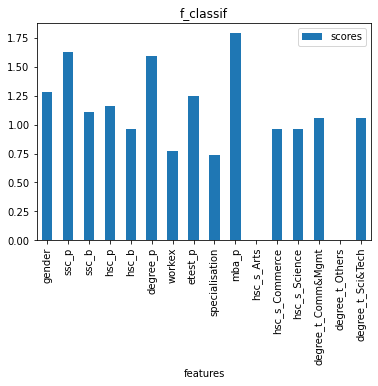

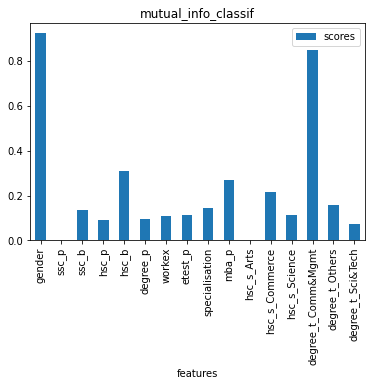

In [91]:
k=0
for i in function_list:
    test=SelectKBest(score_func=i,k=11).fit(x_R,y_R)
    s=pd.DataFrame({'features':x_R.columns.values,'scores' : test.scores_})
    print(s.sort_values(by=['scores'],ascending=False))
    print(s.plot(x='features',kind='bar',title= function_name[k]))
    k+=1

In [92]:
#df_R=df_R.drop(['ssc_p','hsc_p','workex','hsc_s_Arts','specialisation','degree_t_Others'],axis=1)
df_R=df_R[["ssc_p", "mba_p", "degree_t_Sci&Tech", "hsc_s_Science" , "gender", "degree_t_Comm&Mgmt", "degree_p", "ssc_b", "specialisation", "workex","salary"]]

In [93]:
df_R

,ssc_p,mba_p,degree_t_Sci&Tech,hsc_s_Science,gender,degree_t_Comm&Mgmt,degree_p,ssc_b,specialisation,workex,salary
0,0.445545,0.268844,1.0,0.0,1.0,0.0,0.068966,1.0,1.0,0.0,270000.0
1,0.750743,0.582077,1.0,1.0,1.0,0.0,0.740690,0.0,0.0,1.0,200000.0
2,0.910891,0.130653,0.0,0.0,1.0,1.0,0.596552,0.0,0.0,0.0,425000.0
3,0.816832,0.408710,1.0,1.0,1.0,0.0,0.344828,0.0,0.0,1.0,252000.0
4,0.594059,0.373116,0.0,0.0,1.0,1.0,0.551724,0.0,0.0,0.0,231000.0
...,...,...,...,...,...,...,...,...,...,...,...
131,0.321782,0.172111,0.0,0.0,1.0,1.0,0.310345,0.0,0.0,0.0,216000.0
132,0.782178,0.925879,0.0,0.0,1.0,1.0,0.744828,1.0,0.0,0.0,400000.0
133,0.222772,0.051926,1.0,1.0,1.0,0.0,0.551724,1.0,0.0,0.0,275000.0
134,0.445545,0.726131,0.0,0.0,1.0,1.0,0.586207,1.0,0.0,1.0,295000.0


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_R.drop(["salary"],axis=1),df_R["salary"],test_size = 0.3)

In [95]:
#linear regression , knn, decision tree
y_test.to_numpy().reshape(-1, 1);

In [96]:
#Linear regression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.1767165960868442

In [97]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
parameters = {'algorithm':('ball_tree', 'kd_tree', 'brute'),'n_neighbors': [i for i in range(1,30)]}
best_parameters= Grid_search(model, parameters)
model = KNeighborsRegressor(algorithm=best_parameters["algorithm"],n_neighbors=best_parameters["n_neighbors"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.32655687969824343

In [98]:
##decision tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
model = DecisionTreeRegressor()
parameters = {'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],'splitter':["best", "random"],'max_depth': [i for i in range(1,10)]+[None] ,'max_features':['sqrt', 'log2']+[None],'ccp_alpha': [i for i in range(0,10)]}
best_parameters= Grid_search(model, parameters)
model=DecisionTreeRegressor(criterion=best_parameters["criterion"],splitter=best_parameters["splitter"],max_depth=best_parameters["max_depth"],max_features=best_parameters["max_features"],ccp_alpha=best_parameters["ccp_alpha"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.4476302181897833

In [99]:
from sklearn.svm import SVR
model=SVR()
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'degree':[i for i in range(1,5)],'coef0':[i for i in range(0,5)],'C':[i for i in range(1,10)]}
best_parameters= Grid_search(model, parameters)
model=SVR(kernel=best_parameters["kernel"],C=best_parameters["C"],degree=best_parameters["degree"],coef0=best_parameters["coef0"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.10157004537543446

# Classification

In [100]:
df_C

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status
0,1.0,0.538240,1.0,0.883882,1.0,0.228571,0.0,0.104167,1.0,0.300761,0.0,1.0,0.0,0.0,0.0,1.0,1
1,1.0,0.792414,0.0,0.664298,1.0,0.785143,1.0,0.760417,0.0,0.600320,0.0,0.0,1.0,0.0,0.0,1.0,1
2,1.0,0.311482,0.0,0.207972,0.0,0.057143,0.0,0.333333,1.0,0.325991,0.0,0.0,1.0,0.0,0.0,1.0,0
3,1.0,0.925788,0.0,0.582322,0.0,0.665714,0.0,0.975000,0.0,0.168602,0.0,1.0,0.0,1.0,0.0,0.0,1
4,1.0,0.290868,1.0,0.169844,1.0,0.492857,1.0,0.104167,0.0,0.011614,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1.0,0.818594,1.0,0.727903,1.0,0.788571,0.0,0.854167,0.0,0.929115,0.0,1.0,0.0,1.0,0.0,0.0,1
190,1.0,0.352711,1.0,0.346620,1.0,0.628571,0.0,0.500000,0.0,0.093312,0.0,0.0,1.0,0.0,0.0,1.0,1
191,1.0,0.538240,1.0,0.467938,1.0,0.657143,1.0,0.187500,0.0,0.738086,0.0,1.0,0.0,1.0,0.0,0.0,1
192,0.0,0.682540,1.0,0.450607,1.0,0.228571,0.0,0.416667,1.0,0.358030,0.0,1.0,0.0,1.0,0.0,0.0,1


/home/priyanshu/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


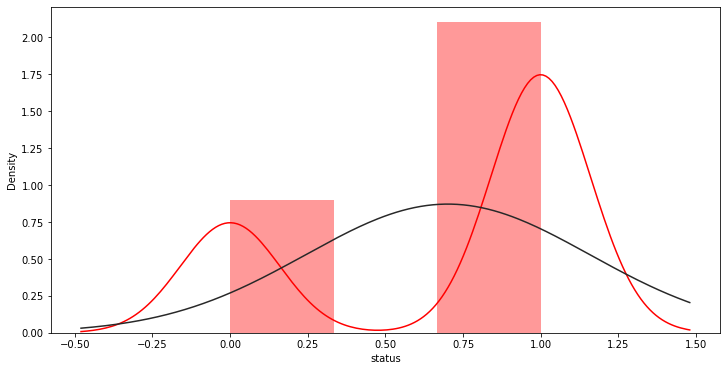

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

plt.figure(figsize=(12,6))
sns.distplot(df_C['status'],fit=norm,color='r')
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression
def feature_selection(variable_counts,func):
    test=SelectKBest(score_func=func,k=variable_counts)
    fit=test.fit(x_C,y_C)
    feature_selected=x_C.columns[fit.get_support()]
    X_sel = fit.transform(x_C)
    
    reg=LogisticRegression()
    reg.fit(X_sel,y_C)
    y_pred=reg.predict(x_C[feature_selected])
    return  mean_squared_error(y_C,y_pred)


In [103]:
error_t = pd.DataFrame({'features count':[],'error':[],'func name' : []})
function_list =[chi2, f_classif, mutual_info_classif]
function_name =['chi2', 'f_classif', 'mutual_info_classif']
k=0 

for j in function_list:
    for i in range(1,len(df_C.columns)):
        error= feature_selection(i,j)
        error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
    k+=1
error_t

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_13062/3570060494.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/tmp/ipykernel_13062/3570060494.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  error_t=error_t.append({'features count': i,'error':error,'func name' : function_name[k]},ignore_index=True)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/base.py

,features count,error,func name
0,1.0,0.298969,chi2
1,2.0,0.298969,chi2
2,3.0,0.180412,chi2
3,4.0,0.154639,chi2
4,5.0,0.144330,chi2
5,6.0,0.139175,chi2
6,7.0,0.139175,chi2
7,8.0,0.128866,chi2
8,9.0,0.123711,chi2
9,10.0,0.118557,chi2


<AxesSubplot:xlabel='features count', ylabel='error'>

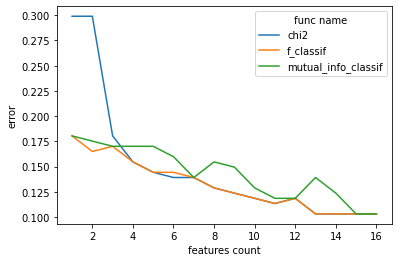

In [104]:
sns.lineplot(data=error_t,x='features count',y='error',hue='func name')

              features    scores
6               workex  9.594952
8       specialisation  7.070056
1                ssc_p  5.866649
5             degree_p  3.837706
3                hsc_p  3.182436
0               gender  1.034487
7              etest_p  0.669786
2                ssc_b  0.448073
15   degree_t_Sci&Tech  0.076946
4                hsc_b  0.044232
9                mba_p  0.036058
13  degree_t_Comm&Mgmt  0.032014
12       hsc_s_Science  0.001980
11      hsc_s_Commerce  0.001480
10          hsc_s_Arts       NaN
14     degree_t_Others       NaN
AxesSubplot(0.125,0.125;0.775x0.755)
              features      scores
1                ssc_p  103.256421
5             degree_p   57.220548
3                hsc_p   55.398262
6               workex   15.428417
8       specialisation   13.449436
7              etest_p    3.987379
0               gender    3.057337
2                ssc_b    0.830791
9                mba_p    0.293014
4                hsc_b    0.121399
15   degree_t_Sci

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10 14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


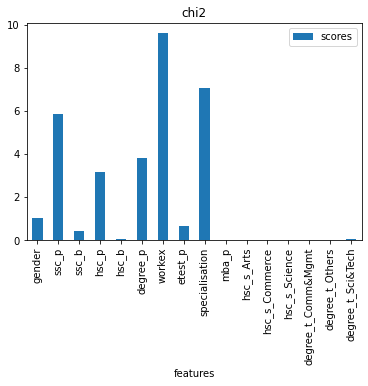

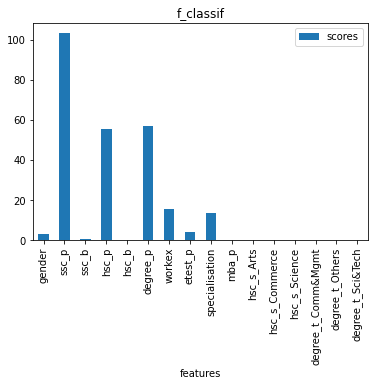

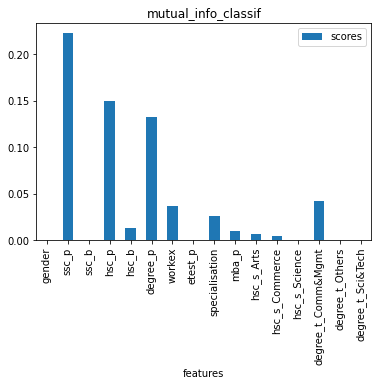

In [105]:
k=0
for i in function_list:
    test=SelectKBest(score_func=i,k=11).fit(x_C,y_C)
    s=pd.DataFrame({'features':x_C.columns.values,'scores' : test.scores_})
    print(s.sort_values(by=['scores'],ascending=False))
    print(s.plot(x='features',kind='bar',title= function_name[k]))
    k+=1

In [106]:
df_C=df_C.drop(['ssc_b','hsc_b','hsc_s_Arts','hsc_s_Science','degree_t_Others'],axis=1)

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_C.drop(["status"],axis=1),df_C["status"],test_size = 0.3)

In [108]:
#Logistic regression
model=LogisticRegression()
parameters = {'penalty':['l1', 'l2', 'elasticnet'],'C':[i for i in range(1,100)]}
best_parameters= Grid_search(model, parameters)
model=LogisticRegression(penalty=best_parameters["penalty"],C=best_parameters["C"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
990 fits failed out of a total of 1485.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
495 fits failed with the following error:
Traceback (most recent call last):
  File "/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", l

0.8813559322033898

In [109]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
parameters = {'algorithm':('ball_tree', 'kd_tree', 'brute'),'n_neighbors': [i for i in range(1,30)]}
best_parameters= Grid_search(model, parameters)
model = KNeighborsClassifier(algorithm=best_parameters["algorithm"],n_neighbors=best_parameters["n_neighbors"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/priyanshu/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer b

0.7288135593220338

In [110]:
##decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier()
parameters = {'criterion':("gini", "entropy", "log_loss"), 'splitter':["best", "random"],'max_depth': [i for i in range(1,10)]+[None] ,'max_features':['sqrt', 'log2']+[None],'ccp_alpha': [i for i in range(0,10)]}
best_parameters= Grid_search(model, parameters)
model=DecisionTreeClassifier(criterion=best_parameters["criterion"],splitter=best_parameters["splitter"],max_depth=best_parameters["max_depth"],max_features=best_parameters["max_features"],ccp_alpha=best_parameters["ccp_alpha"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.711864406779661

In [111]:
#SVM
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[i for i in range(1,10)]}
model=SVC()
parameters= Grid_search(model, parameters)
model=SVC(kernel=best_parameters["kernel"],C=best_parameters["C"])
model.fit(x_train,y_train)
model.score(x_test,y_test)

KeyError: 'kernel'